# KRX에서 오늘 날짜의 종목 가져오기

In [1]:
import pandas as pd

KRX로부터 상장기업 목록 파일을 읽어와서 데이터프레임으로 변환

In [8]:
def read_krx_code() :
    url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
    krx = pd.read_html(url, header=0)[0] # table을 읽어 리스트로 저장
    krx = krx[['종목코드', '회사명']]
    krx = krx.rename(columns={'종목코드':'code', '회사명':'company'}) # 컬럼명 변경
    krx.code = krx.code.map('{:06d}'.format) # 0으로 채워넣은 6자리 숫자 포맷으로 다시 저장
    return krx

In [9]:
# 가져온 종목 출력
read_krx_code()

,code,company
0,000210,DL
1,004840,DRB동일
2,155660,DSR
3,078930,GS
4,001390,KG케미칼
...,...,...
2495,393210,토마토시스템
2496,217880,틸론
2497,222670,플럼라인생명과학
2498,331660,한국미라클피플사


# DB에 저장

## DB와 연결 후 DB에 있는 종목 가져오기

In [10]:
import pymysql
from datetime import datetime

In [11]:
Mypassword = 'sandy9706'
conn = pymysql.connect(host = 'localhost', db='mydb_1', user = 'root', passwd = Mypassword, charset='utf8')

# 종목코드를 company_info 테이블에 업데이트한 후 딕셔너리에 저장
sql = "SELECT * FROM company_info"

codes = dict()
curs = conn.cursor() # connect() 함수의 연결을 사용하는 새로운 Cursor 객체 만들기

df = pd.read_sql(sql, conn) # 해당 sql 내용을 dataframe 형태로 변경

In [12]:
# DB에 있는 종목 찍어보기
df

,code,company,last_update
0,000020,동화약품,2022-04-12
1,000040,KR모터스,2022-04-12
2,000050,경방,2022-04-12
3,000060,메리츠화재,2022-04-12
4,000070,삼양홀딩스,2022-04-12
...,...,...,...
2496,950180,SNK,2022-04-12
2497,950190,미투젠,2022-04-12
2498,950200,소마젠,2022-04-12
2499,950210,프레스티지바이오파마,2022-04-12


## df에 있는 데이터 중 code와 company 컬럼값을 추출

In [14]:
for idx in range(len(df)) :
    codes[df['code'].values[idx]] = df['company'].values[idx]

## DB에서 종목명 업데이트된 마지막 일자 추출

In [20]:
sql = "SELECT max(last_update) FROM company_info"
curs.execute(sql)

# DB에서 가져온 첫 번째 결과
rs = curs.fetchone()
print(rs)

# 오늘 날짜 및 현재시간
var = datetime.today()
print(var)

# 오늘 날짜 부분만 today에 할당
today = datetime.today().strftime('%Y-%m-%d')
print(today)

(datetime.date(2022, 4, 12),)
2022-05-16 14:05:21.365296
2022-05-16


In [25]:
if rs[0] == None or rs[0].strftime('%Y-%m-%d') < today:
    krx = read_krx_code()
    
    for idx in range(len(krx)):
        code = krx.code.values[idx]
        print(code)
        company = krx.company.values[idx]
        print(company)
        sql = f"REPLACE INTO company_info (code, company, last_update) VALUES ('{code}', '{company}', '{today}')"
        curs.execute(sql)
        codes[code] = company
        tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
        print(f"[{tmnow}] #{idx+1:04d} REPLACE INTO company_info VALUES ({code}, {company}, {today})")
        conn.commit()
    
    conn.close()

000210
DL
[2022-05-16 14:38] #0001 REPLACE INTO company_info VALUES (000210, DL, 2022-05-16)
004840
DRB동일
[2022-05-16 14:38] #0002 REPLACE INTO company_info VALUES (004840, DRB동일, 2022-05-16)
155660
DSR
[2022-05-16 14:38] #0003 REPLACE INTO company_info VALUES (155660, DSR, 2022-05-16)
078930
GS
[2022-05-16 14:38] #0004 REPLACE INTO company_info VALUES (078930, GS, 2022-05-16)
001390
KG케미칼
[2022-05-16 14:38] #0005 REPLACE INTO company_info VALUES (001390, KG케미칼, 2022-05-16)
025000
KPX케미칼
[2022-05-16 14:38] #0006 REPLACE INTO company_info VALUES (025000, KPX케미칼, 2022-05-16)
058860
KTis
[2022-05-16 14:38] #0007 REPLACE INTO company_info VALUES (058860, KTis, 2022-05-16)
011070
LG이노텍
[2022-05-16 14:38] #0008 REPLACE INTO company_info VALUES (011070, LG이노텍, 2022-05-16)
037560
LG헬로비전
[2022-05-16 14:38] #0009 REPLACE INTO company_info VALUES (037560, LG헬로비전, 2022-05-16)
108670
LX하우시스
[2022-05-16 14:38] #0010 REPLACE INTO company_info VALUES (108670, LX하우시스, 2022-05-16)
383800
LX홀딩스
[2022-05-

286750
나노브릭
[2022-05-16 14:38] #0118 REPLACE INTO company_info VALUES (286750, 나노브릭, 2022-05-16)
137080
나래나노텍
[2022-05-16 14:38] #0119 REPLACE INTO company_info VALUES (137080, 나래나노텍, 2022-05-16)
094860
네오리진
[2022-05-16 14:38] #0120 REPLACE INTO company_info VALUES (094860, 네오리진, 2022-05-16)
085910
네오티스
[2022-05-16 14:38] #0121 REPLACE INTO company_info VALUES (085910, 네오티스, 2022-05-16)
007390
네이처셀
[2022-05-16 14:38] #0122 REPLACE INTO company_info VALUES (007390, 네이처셀, 2022-05-16)
089140
넥스턴바이오
[2022-05-16 14:38] #0123 REPLACE INTO company_info VALUES (089140, 넥스턴바이오, 2022-05-16)
054050
농우바이오
[2022-05-16 14:38] #0124 REPLACE INTO company_info VALUES (054050, 농우바이오, 2022-05-16)
012340
뉴인텍
[2022-05-16 14:38] #0125 REPLACE INTO company_info VALUES (012340, 뉴인텍, 2022-05-16)
270870
뉴트리
[2022-05-16 14:38] #0126 REPLACE INTO company_info VALUES (270870, 뉴트리, 2022-05-16)
340360
다보링크
[2022-05-16 14:38] #0127 REPLACE INTO company_info VALUES (340360, 다보링크, 2022-05-16)
032190
다우데이타
[2022-05-16 1

263860
지니언스
[2022-05-16 14:38] #0254 REPLACE INTO company_info VALUES (263860, 지니언스, 2022-05-16)
119850
지엔씨에너지
[2022-05-16 14:38] #0255 REPLACE INTO company_info VALUES (119850, 지엔씨에너지, 2022-05-16)
219750
지티지웰니스
[2022-05-16 14:38] #0256 REPLACE INTO company_info VALUES (219750, 지티지웰니스, 2022-05-16)
052300
초록뱀컴퍼니
[2022-05-16 14:38] #0257 REPLACE INTO company_info VALUES (052300, 초록뱀컴퍼니, 2022-05-16)
071850
캐스텍코리아
[2022-05-16 14:38] #0258 REPLACE INTO company_info VALUES (071850, 캐스텍코리아, 2022-05-16)
223310
커머스마이너
[2022-05-16 14:38] #0259 REPLACE INTO company_info VALUES (223310, 커머스마이너, 2022-05-16)
342550
케이비제20호스팩
[2022-05-16 14:38] #0260 REPLACE INTO company_info VALUES (342550, 케이비제20호스팩, 2022-05-16)
347140
케이프이에스제4호
[2022-05-16 14:38] #0261 REPLACE INTO company_info VALUES (347140, 케이프이에스제4호, 2022-05-16)
042040
케이피엠테크
[2022-05-16 14:38] #0262 REPLACE INTO company_info VALUES (042040, 케이피엠테크, 2022-05-16)
054410
케이피티유
[2022-05-16 14:38] #0263 REPLACE INTO company_info VALUES (054410, 케이피

[2022-05-16 14:38] #0403 REPLACE INTO company_info VALUES (192400, 쿠쿠홀딩스, 2022-05-16)
015590
큐로
[2022-05-16 14:38] #0404 REPLACE INTO company_info VALUES (015590, 큐로, 2022-05-16)
259960
크래프톤
[2022-05-16 14:38] #0405 REPLACE INTO company_info VALUES (259960, 크래프톤, 2022-05-16)
003240
태광산업
[2022-05-16 14:38] #0406 REPLACE INTO company_info VALUES (003240, 태광산업, 2022-05-16)
009410
태영건설
[2022-05-16 14:38] #0407 REPLACE INTO company_info VALUES (009410, 태영건설, 2022-05-16)
084870
티비에이치글로벌
[2022-05-16 14:38] #0408 REPLACE INTO company_info VALUES (084870, 티비에이치글로벌, 2022-05-16)
003670
포스코케미칼
[2022-05-16 14:38] #0409 REPLACE INTO company_info VALUES (003670, 포스코케미칼, 2022-05-16)
039130
하나투어
[2022-05-16 14:38] #0410 REPLACE INTO company_info VALUES (039130, 하나투어, 2022-05-16)
000080
하이트진로
[2022-05-16 14:38] #0411 REPLACE INTO company_info VALUES (000080, 하이트진로, 2022-05-16)
071050
한국금융지주
[2022-05-16 14:38] #0412 REPLACE INTO company_info VALUES (071050, 한국금융지주, 2022-05-16)
006200
한국전자홀딩스
[2022-05-16 

[2022-05-16 14:38] #0541 REPLACE INTO company_info VALUES (030530, 원익홀딩스, 2022-05-16)
012620
원일특강
[2022-05-16 14:38] #0542 REPLACE INTO company_info VALUES (012620, 원일특강, 2022-05-16)
192390
윈하이텍
[2022-05-16 14:38] #0543 REPLACE INTO company_info VALUES (192390, 윈하이텍, 2022-05-16)
313760
윌링스
[2022-05-16 14:38] #0544 REPLACE INTO company_info VALUES (313760, 윌링스, 2022-05-16)
086390
유니테스트
[2022-05-16 14:38] #0545 REPLACE INTO company_info VALUES (086390, 유니테스트, 2022-05-16)
367480
유안타제8호스팩
[2022-05-16 14:38] #0546 REPLACE INTO company_info VALUES (367480, 유안타제8호스팩, 2022-05-16)
263770
유에스티
[2022-05-16 14:38] #0547 REPLACE INTO company_info VALUES (263770, 유에스티, 2022-05-16)
044960
이글벳
[2022-05-16 14:38] #0548 REPLACE INTO company_info VALUES (044960, 이글벳, 2022-05-16)
088390
이녹스
[2022-05-16 14:38] #0549 REPLACE INTO company_info VALUES (088390, 이녹스, 2022-05-16)
264850
이랜시스
[2022-05-16 14:38] #0550 REPLACE INTO company_info VALUES (264850, 이랜시스, 2022-05-16)
351330
이삭엔지니어링
[2022-05-16 14:38] #05

003410
쌍용씨앤이
[2022-05-16 14:38] #0686 REPLACE INTO company_info VALUES (003410, 쌍용씨앤이, 2022-05-16)
004920
씨아이테크
[2022-05-16 14:38] #0687 REPLACE INTO company_info VALUES (004920, 씨아이테크, 2022-05-16)
010780
아이에스동서
[2022-05-16 14:38] #0688 REPLACE INTO company_info VALUES (010780, 아이에스동서, 2022-05-16)
139990
아주스틸
[2022-05-16 14:38] #0689 REPLACE INTO company_info VALUES (139990, 아주스틸, 2022-05-16)
018250
애경산업
[2022-05-16 14:38] #0690 REPLACE INTO company_info VALUES (018250, 애경산업, 2022-05-16)
161000
애경케미칼
[2022-05-16 14:38] #0691 REPLACE INTO company_info VALUES (161000, 애경케미칼, 2022-05-16)
007460
에이프로젠 MED
[2022-05-16 14:38] #0692 REPLACE INTO company_info VALUES (007460, 에이프로젠 MED, 2022-05-16)
181710
엔에이치엔
[2022-05-16 14:38] #0693 REPLACE INTO company_info VALUES (181710, 엔에이치엔, 2022-05-16)
097520
엠씨넥스
[2022-05-16 14:38] #0694 REPLACE INTO company_info VALUES (097520, 엠씨넥스, 2022-05-16)
015360
예스코홀딩스
[2022-05-16 14:38] #0695 REPLACE INTO company_info VALUES (015360, 예스코홀딩스, 2022-05-16)
0069

[2022-05-16 14:38] #0817 REPLACE INTO company_info VALUES (052770, 아이톡시, 2022-05-16)
032080
아즈텍WB
[2022-05-16 14:38] #0818 REPLACE INTO company_info VALUES (032080, 아즈텍WB, 2022-05-16)
013310
아진산업
[2022-05-16 14:38] #0819 REPLACE INTO company_info VALUES (013310, 아진산업, 2022-05-16)
085810
알티캐스트
[2022-05-16 14:38] #0820 REPLACE INTO company_info VALUES (085810, 알티캐스트, 2022-05-16)
196300
애니젠
[2022-05-16 14:38] #0821 REPLACE INTO company_info VALUES (196300, 애니젠, 2022-05-16)
263540
어스앤에어로스페이스
[2022-05-16 14:38] #0822 REPLACE INTO company_info VALUES (263540, 어스앤에어로스페이스, 2022-05-16)
238120
얼라인드
[2022-05-16 14:38] #0823 REPLACE INTO company_info VALUES (238120, 얼라인드, 2022-05-16)
270660
에브리봇
[2022-05-16 14:38] #0824 REPLACE INTO company_info VALUES (270660, 에브리봇, 2022-05-16)
260970
에스앤디
[2022-05-16 14:38] #0825 REPLACE INTO company_info VALUES (260970, 에스앤디, 2022-05-16)
306040
에스제이그룹
[2022-05-16 14:38] #0826 REPLACE INTO company_info VALUES (306040, 에스제이그룹, 2022-05-16)
234300
에스트래픽
[2022-05-16

[2022-05-16 14:38] #0954 REPLACE INTO company_info VALUES (204320, 만도, 2022-05-16)
094800
맵스리얼티1
[2022-05-16 14:38] #0955 REPLACE INTO company_info VALUES (094800, 맵스리얼티1, 2022-05-16)
007120
미래아이앤지
[2022-05-16 14:38] #0956 REPLACE INTO company_info VALUES (007120, 미래아이앤지, 2022-05-16)
396690
미래에셋글로벌리츠
[2022-05-16 14:38] #0957 REPLACE INTO company_info VALUES (396690, 미래에셋글로벌리츠, 2022-05-16)
155900
바다로19호
[2022-05-16 14:38] #0958 REPLACE INTO company_info VALUES (155900, 바다로19호, 2022-05-16)
003000
부광약품
[2022-05-16 14:38] #0959 REPLACE INTO company_info VALUES (003000, 부광약품, 2022-05-16)
011390
부산산업
[2022-05-16 14:38] #0960 REPLACE INTO company_info VALUES (011390, 부산산업, 2022-05-16)
005030
부산주공
[2022-05-16 14:38] #0961 REPLACE INTO company_info VALUES (005030, 부산주공, 2022-05-16)
007160
사조산업
[2022-05-16 14:38] #0962 REPLACE INTO company_info VALUES (007160, 사조산업, 2022-05-16)
014710
사조씨푸드
[2022-05-16 14:38] #0963 REPLACE INTO company_info VALUES (014710, 사조씨푸드, 2022-05-16)
001360
삼성제약
[2022-05

091990
셀트리온헬스케어
[2022-05-16 14:38] #1101 REPLACE INTO company_info VALUES (091990, 셀트리온헬스케어, 2022-05-16)
950200
소마젠
[2022-05-16 14:38] #1102 REPLACE INTO company_info VALUES (950200, 소마젠, 2022-05-16)
094840
슈프리마에이치큐
[2022-05-16 14:38] #1103 REPLACE INTO company_info VALUES (094840, 슈프리마에이치큐, 2022-05-16)
033170
시그네틱스
[2022-05-16 14:38] #1104 REPLACE INTO company_info VALUES (033170, 시그네틱스, 2022-05-16)
025320
시노펙스
[2022-05-16 14:38] #1105 REPLACE INTO company_info VALUES (025320, 시노펙스, 2022-05-16)
419270
신영스팩7호
[2022-05-16 14:38] #1106 REPLACE INTO company_info VALUES (419270, 신영스팩7호, 2022-05-16)
366330
신한제7호스팩
[2022-05-16 14:38] #1107 REPLACE INTO company_info VALUES (366330, 신한제7호스팩, 2022-05-16)
222080
씨아이에스
[2022-05-16 14:38] #1108 REPLACE INTO company_info VALUES (222080, 씨아이에스, 2022-05-16)
264660
씨앤지하이테크
[2022-05-16 14:38] #1109 REPLACE INTO company_info VALUES (264660, 씨앤지하이테크, 2022-05-16)
359090
씨엔알리서치
[2022-05-16 14:38] #1110 REPLACE INTO company_info VALUES (359090, 씨엔알리서치, 2022

[2022-05-16 14:38] #1242 REPLACE INTO company_info VALUES (139130, DGB금융지주, 2022-05-16)
001940
KISCO홀딩스
[2022-05-16 14:38] #1243 REPLACE INTO company_info VALUES (001940, KISCO홀딩스, 2022-05-16)
034220
LG디스플레이
[2022-05-16 14:38] #1244 REPLACE INTO company_info VALUES (034220, LG디스플레이, 2022-05-16)
373220
LG에너지솔루션
[2022-05-16 14:38] #1245 REPLACE INTO company_info VALUES (373220, LG에너지솔루션, 2022-05-16)
006260
LS
[2022-05-16 14:38] #1246 REPLACE INTO company_info VALUES (006260, LS, 2022-05-16)
001120
LX인터내셔널
[2022-05-16 14:38] #1247 REPLACE INTO company_info VALUES (001120, LX인터내셔널, 2022-05-16)
338100
NH프라임리츠
[2022-05-16 14:38] #1248 REPLACE INTO company_info VALUES (338100, NH프라임리츠, 2022-05-16)
010950
S-Oil
[2022-05-16 14:38] #1249 REPLACE INTO company_info VALUES (010950, S-Oil, 2022-05-16)
302440
SK바이오사이언스
[2022-05-16 14:38] #1250 REPLACE INTO company_info VALUES (302440, SK바이오사이언스, 2022-05-16)
285130
SK케미칼
[2022-05-16 14:38] #1251 REPLACE INTO company_info VALUES (285130, SK케미칼, 2022-05

025950
동신건설
[2022-05-16 14:38] #1378 REPLACE INTO company_info VALUES (025950, 동신건설, 2022-05-16)
041930
동아화성
[2022-05-16 14:38] #1379 REPLACE INTO company_info VALUES (041930, 동아화성, 2022-05-16)
228340
동양파일
[2022-05-16 14:38] #1380 REPLACE INTO company_info VALUES (228340, 동양파일, 2022-05-16)
263720
디앤씨미디어
[2022-05-16 14:38] #1381 REPLACE INTO company_info VALUES (263720, 디앤씨미디어, 2022-05-16)
310870
디와이씨
[2022-05-16 14:38] #1382 REPLACE INTO company_info VALUES (310870, 디와이씨, 2022-05-16)
079810
디이엔티
[2022-05-16 14:38] #1383 REPLACE INTO company_info VALUES (079810, 디이엔티, 2022-05-16)
300120
라온피플
[2022-05-16 14:38] #1384 REPLACE INTO company_info VALUES (300120, 라온피플, 2022-05-16)
084650
랩지노믹스
[2022-05-16 14:38] #1385 REPLACE INTO company_info VALUES (084650, 랩지노믹스, 2022-05-16)
900260
로스웰
[2022-05-16 14:38] #1386 REPLACE INTO company_info VALUES (900260, 로스웰, 2022-05-16)
302550
리메드
[2022-05-16 14:38] #1387 REPLACE INTO company_info VALUES (302550, 리메드, 2022-05-16)
277070
린드먼아시아
[2022-05-16 14

[2022-05-16 14:38] #1519 REPLACE INTO company_info VALUES (043370, 피에이치에이, 2022-05-16)
128660
피제이메탈
[2022-05-16 14:38] #1520 REPLACE INTO company_info VALUES (128660, 피제이메탈, 2022-05-16)
406760
하나금융21호스팩
[2022-05-16 14:38] #1521 REPLACE INTO company_info VALUES (406760, 하나금융21호스팩, 2022-05-16)
041460
한국전자인증
[2022-05-16 14:38] #1522 REPLACE INTO company_info VALUES (041460, 한국전자인증, 2022-05-16)
021650
한국큐빅
[2022-05-16 14:38] #1523 REPLACE INTO company_info VALUES (021650, 한국큐빅, 2022-05-16)
030520
한글과컴퓨터
[2022-05-16 14:38] #1524 REPLACE INTO company_info VALUES (030520, 한글과컴퓨터, 2022-05-16)
256150
한독크린텍
[2022-05-16 14:38] #1525 REPLACE INTO company_info VALUES (256150, 한독크린텍, 2022-05-16)
043090
한창바이오텍
[2022-05-16 14:38] #1526 REPLACE INTO company_info VALUES (043090, 한창바이오텍, 2022-05-16)
034810
해성산업
[2022-05-16 14:38] #1527 REPLACE INTO company_info VALUES (034810, 해성산업, 2022-05-16)
041440
현대에버다임
[2022-05-16 14:38] #1528 REPLACE INTO company_info VALUES (041440, 현대에버다임, 2022-05-16)
064240
홈캐스

049720
고려신용정보
[2022-05-16 14:38] #1663 REPLACE INTO company_info VALUES (049720, 고려신용정보, 2022-05-16)
348150
고바이오랩
[2022-05-16 14:38] #1664 REPLACE INTO company_info VALUES (348150, 고바이오랩, 2022-05-16)
038530
골드퍼시픽
[2022-05-16 14:38] #1665 REPLACE INTO company_info VALUES (038530, 골드퍼시픽, 2022-05-16)
029480
광무
[2022-05-16 14:38] #1666 REPLACE INTO company_info VALUES (029480, 광무, 2022-05-16)
026910
광진실업
[2022-05-16 14:38] #1667 REPLACE INTO company_info VALUES (026910, 광진실업, 2022-05-16)
066620
국보디자인
[2022-05-16 14:38] #1668 REPLACE INTO company_info VALUES (066620, 국보디자인, 2022-05-16)
186230
그린플러스
[2022-05-16 14:38] #1669 REPLACE INTO company_info VALUES (186230, 그린플러스, 2022-05-16)
035460
기산텔레콤
[2022-05-16 14:38] #1670 REPLACE INTO company_info VALUES (035460, 기산텔레콤, 2022-05-16)
247660
나노씨엠에스
[2022-05-16 14:38] #1671 REPLACE INTO company_info VALUES (247660, 나노씨엠에스, 2022-05-16)
095660
네오위즈
[2022-05-16 14:38] #1672 REPLACE INTO company_info VALUES (095660, 네오위즈, 2022-05-16)
033640
네패스
[2022

166480
코아스템
[2022-05-16 14:38] #1806 REPLACE INTO company_info VALUES (166480, 코아스템, 2022-05-16)
294570
쿠콘
[2022-05-16 14:38] #1807 REPLACE INTO company_info VALUES (294570, 쿠콘, 2022-05-16)
060280
큐렉소
[2022-05-16 14:38] #1808 REPLACE INTO company_info VALUES (060280, 큐렉소, 2022-05-16)
040350
큐로컴
[2022-05-16 14:38] #1809 REPLACE INTO company_info VALUES (040350, 큐로컴, 2022-05-16)
115180
큐리언트
[2022-05-16 14:38] #1810 REPLACE INTO company_info VALUES (115180, 큐리언트, 2022-05-16)
016600
큐캐피탈
[2022-05-16 14:38] #1811 REPLACE INTO company_info VALUES (016600, 큐캐피탈, 2022-05-16)
054780
키이스트
[2022-05-16 14:38] #1812 REPLACE INTO company_info VALUES (054780, 키이스트, 2022-05-16)
182690
테라셈
[2022-05-16 14:38] #1813 REPLACE INTO company_info VALUES (182690, 테라셈, 2022-05-16)
064760
티씨케이
[2022-05-16 14:38] #1814 REPLACE INTO company_info VALUES (064760, 티씨케이, 2022-05-16)
340570
티앤엘
[2022-05-16 14:38] #1815 REPLACE INTO company_info VALUES (340570, 티앤엘, 2022-05-16)
277880
티에스아이
[2022-05-16 14:38] #1816 REPL

[2022-05-16 14:38] #1952 REPLACE INTO company_info VALUES (057050, 현대홈쇼핑, 2022-05-16)
002460
화성산업
[2022-05-16 14:38] #1953 REPLACE INTO company_info VALUES (002460, 화성산업, 2022-05-16)
058820
CMG제약
[2022-05-16 14:38] #1954 REPLACE INTO company_info VALUES (058820, CMG제약, 2022-05-16)
078150
HB테크놀러지
[2022-05-16 14:38] #1955 REPLACE INTO company_info VALUES (078150, HB테크놀러지, 2022-05-16)
388790
IBKS제16호스팩
[2022-05-16 14:38] #1956 REPLACE INTO company_info VALUES (388790, IBKS제16호스팩, 2022-05-16)
044180
KD
[2022-05-16 14:38] #1957 REPLACE INTO company_info VALUES (044180, KD, 2022-05-16)
035600
KG이니시스
[2022-05-16 14:38] #1958 REPLACE INTO company_info VALUES (035600, KG이니시스, 2022-05-16)
058400
KNN
[2022-05-16 14:38] #1959 REPLACE INTO company_info VALUES (058400, KNN, 2022-05-16)
053290
NE능률
[2022-05-16 14:38] #1960 REPLACE INTO company_info VALUES (053290, NE능률, 2022-05-16)
060250
NHN한국사이버결제
[2022-05-16 14:38] #1961 REPLACE INTO company_info VALUES (060250, NHN한국사이버결제, 2022-05-16)
019550
SBI인

일진파워
[2022-05-16 14:38] #2084 REPLACE INTO company_info VALUES (094820, 일진파워, 2022-05-16)
187420
제노포커스
[2022-05-16 14:38] #2085 REPLACE INTO company_info VALUES (187420, 제노포커스, 2022-05-16)
123330
제닉
[2022-05-16 14:38] #2086 REPLACE INTO company_info VALUES (123330, 제닉, 2022-05-16)
147830
제룡산업
[2022-05-16 14:38] #2087 REPLACE INTO company_info VALUES (147830, 제룡산업, 2022-05-16)
054950
제이브이엠
[2022-05-16 14:38] #2088 REPLACE INTO company_info VALUES (054950, 제이브이엠, 2022-05-16)
137950
제이씨케미칼
[2022-05-16 14:38] #2089 REPLACE INTO company_info VALUES (137950, 제이씨케미칼, 2022-05-16)
126880
제이엔케이히터
[2022-05-16 14:38] #2090 REPLACE INTO company_info VALUES (126880, 제이엔케이히터, 2022-05-16)
229000
젠큐릭스
[2022-05-16 14:38] #2091 REPLACE INTO company_info VALUES (229000, 젠큐릭스, 2022-05-16)
000440
중앙에너비스
[2022-05-16 14:38] #2092 REPLACE INTO company_info VALUES (000440, 중앙에너비스, 2022-05-16)
314130
지놈앤컴퍼니
[2022-05-16 14:38] #2093 REPLACE INTO company_info VALUES (314130, 지놈앤컴퍼니, 2022-05-16)
382800
지앤비에스엔지니어링
[

[2022-05-16 14:38] #2214 REPLACE INTO company_info VALUES (006740, 영풍제지, 2022-05-16)
010050
우리종금
[2022-05-16 14:38] #2215 REPLACE INTO company_info VALUES (010050, 우리종금, 2022-05-16)
010400
우진아이엔에스
[2022-05-16 14:38] #2216 REPLACE INTO company_info VALUES (010400, 우진아이엔에스, 2022-05-16)
095720
웅진씽크빅
[2022-05-16 14:38] #2217 REPLACE INTO company_info VALUES (095720, 웅진씽크빅, 2022-05-16)
000700
유수홀딩스
[2022-05-16 14:38] #2218 REPLACE INTO company_info VALUES (000700, 유수홀딩스, 2022-05-16)
072130
유엔젤
[2022-05-16 14:38] #2219 REPLACE INTO company_info VALUES (072130, 유엔젤, 2022-05-16)
000220
유유제약
[2022-05-16 14:38] #2220 REPLACE INTO company_info VALUES (000220, 유유제약, 2022-05-16)
008730
율촌화학
[2022-05-16 14:38] #2221 REPLACE INTO company_info VALUES (008730, 율촌화학, 2022-05-16)
350520
이지스레지던스리츠
[2022-05-16 14:38] #2222 REPLACE INTO company_info VALUES (350520, 이지스레지던스리츠, 2022-05-16)
000760
이화산업
[2022-05-16 14:38] #2223 REPLACE INTO company_info VALUES (000760, 이화산업, 2022-05-16)
023810
인팩
[2022-05-16 14

[2022-05-16 14:38] #2338 REPLACE INTO company_info VALUES (200780, 비씨월드제약, 2022-05-16)
141000
비아트론
[2022-05-16 14:38] #2339 REPLACE INTO company_info VALUES (141000, 비아트론, 2022-05-16)
093190
빅솔론
[2022-05-16 14:38] #2340 REPLACE INTO company_info VALUES (093190, 빅솔론, 2022-05-16)
072950
빛샘전자
[2022-05-16 14:38] #2341 REPLACE INTO company_info VALUES (072950, 빛샘전자, 2022-05-16)
065570
삼영이엔씨
[2022-05-16 14:38] #2342 REPLACE INTO company_info VALUES (065570, 삼영이엔씨, 2022-05-16)
294630
서남
[2022-05-16 14:38] #2343 REPLACE INTO company_info VALUES (294630, 서남, 2022-05-16)
035890
서희건설
[2022-05-16 14:38] #2344 REPLACE INTO company_info VALUES (035890, 서희건설, 2022-05-16)
053060
세동
[2022-05-16 14:38] #2345 REPLACE INTO company_info VALUES (053060, 세동, 2022-05-16)
340440
세림B&G
[2022-05-16 14:38] #2346 REPLACE INTO company_info VALUES (340440, 세림B&G, 2022-05-16)
024830
세원물산
[2022-05-16 14:38] #2347 REPLACE INTO company_info VALUES (024830, 세원물산, 2022-05-16)
067770
세진티에스
[2022-05-16 14:38] #2348 REPLACE 

[2022-05-16 14:38] #2466 REPLACE INTO company_info VALUES (299030, 하나기술, 2022-05-16)
013030
하이록코리아
[2022-05-16 14:38] #2467 REPLACE INTO company_info VALUES (013030, 하이록코리아, 2022-05-16)
126700
하이비젼시스템
[2022-05-16 14:38] #2468 REPLACE INTO company_info VALUES (126700, 하이비젼시스템, 2022-05-16)
066130
하츠
[2022-05-16 14:38] #2469 REPLACE INTO company_info VALUES (066130, 하츠, 2022-05-16)
034950
한국기업평가
[2022-05-16 14:38] #2470 REPLACE INTO company_info VALUES (034950, 한국기업평가, 2022-05-16)
063570
한국전자금융
[2022-05-16 14:38] #2471 REPLACE INTO company_info VALUES (063570, 한국전자금융, 2022-05-16)
039740
한국정보공학
[2022-05-16 14:38] #2472 REPLACE INTO company_info VALUES (039740, 한국정보공학, 2022-05-16)
037230
한국팩키지
[2022-05-16 14:38] #2473 REPLACE INTO company_info VALUES (037230, 한국팩키지, 2022-05-16)
052600
한네트
[2022-05-16 14:38] #2474 REPLACE INTO company_info VALUES (052600, 한네트, 2022-05-16)
092460
한라IMS
[2022-05-16 14:38] #2475 REPLACE INTO company_info VALUES (092460, 한라IMS, 2022-05-16)
042520
한스바이오메드
[2022-0

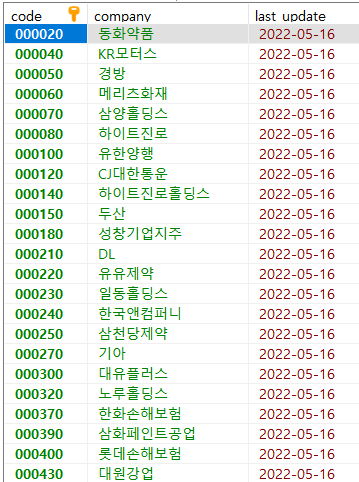